# Описание проекта 

**Заголовок**: Исследование данных интернет-магазина "Стримчик".

**Описание проекта**: Есть данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры (данные о продажах игр, оценки пользователей и экспертов, жанры и платформы). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Есть данные до 2016 года. Нужно отработать принцип работы с данными. 

**Цель исследования**: Выявить факторы, определяющие успешность игры.

**Ход исследования**:
- Подготовка данных: загрузка и изучение данных, заполнение пропусков, обработка дубликатов 
- Исследовательский анализ данных: изучение основных параметров объектов, их распределения, зависимости.
- Составление портрета пользователя каждого региона (определение популярных платформ и жанров)
- Проверка гипотез: 
        - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        - Средние пользовательские рейтинги жанров Action и Sports разные.

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('/datasets/games.csv')
display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Вывод:
- Некорректные названия столбцов
- Неправильные типы данных по некоторым столбцам
- Есть пропуски
- Проверим на дубликаты

## Подготовим данные

In [5]:
#Приведем к нижнему регистру названия столбцов
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Преобразуем данные к нужному типу
# столбец year_of_release - тип object заменим на int
games['year_of_release'] = pd.array(games['year_of_release'], dtype = pd.Int64Dtype())

In [7]:
# Обработаем пропуски
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


- столбец 'name' имеет  2 пропуска. **Удалим.**
- столбец 'genre' имеет  2 пропуска. **Удалим.**
- столбец 'year_of_release' - 269 пропусков. Год выпуска находится между 1980 и 2016. Так как к определенному году привяжется 269 дополнительных игр, при замене средним или медианным значением дальнейший анализ будет недостоверным. **Удалим.**
- столбцы 'critic_score', 'user_score' - это оценочные показатели. Не можем заменить пропуски средним или медианным значением. Также нельзя заменить пропуски нулями. Оставим, как есть.
- столбец 'rating' имеет 6766 пропусков. Значения этого столбца понадобятся нам для анализа, заменим пропуски значением 'no_rating'.

Пропуски в перечисленных столбцах могли появиться из-за человеческого фактора (неправильный ввод данных), также из-за технических проблем (ошибка при сохранении файла, при его отправке).

In [9]:
# Удалим пропуски в столбцах name, genre, year_of_release
games = games.dropna(subset=['name', 'genre', 'year_of_release'])

In [10]:
# в поле 'rating' заменим пропуски
games['rating'] = games['rating'].fillna('no_rating')
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [11]:
# Проверим данные на дубликаты
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# Посмотрим на строки со значением tbd
games.query('user_score == "tbd"').sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5253,Press Your Luck 2010 Edition,Wii,2009,Misc,0.33,0.00,0.0,0.03,NaN,tbd,E
6036,Karaoke Revolution Glee: Volume 3,Wii,2011,Misc,0.23,0.04,0.0,0.02,NaN,tbd,T
4429,Puppy Luv: Spa and Resort,DS,2007,Simulation,0.40,0.00,0.0,0.03,NaN,tbd,E
3678,ZhuZhu Pets 2: Featuring The Wild Bunch,DS,2010,Simulation,0.40,0.10,0.0,0.04,NaN,tbd,E
6575,The Penguins of Madagascar,DS,2010,Action,0.12,0.11,0.0,0.02,NaN,tbd,E


Значение 'tbd' означаем отсутствие оценки (если информации нет). Заменим 'tbd' на 'nan'. Тип данных столбца заменим на float.

In [15]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

In [16]:
# Проверим таблицу на явные дубликаты
games.duplicated().sum()

0

In [17]:
list(games['name'].unique())

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

In [18]:
list(games['year_of_release'].unique())

[2006,
 1985,
 2008,
 2009,
 1996,
 1989,
 1984,
 2005,
 1999,
 2007,
 2010,
 2013,
 2004,
 1990,
 1988,
 2002,
 2001,
 2011,
 1998,
 2015,
 2012,
 2014,
 1992,
 1997,
 1993,
 1994,
 1982,
 2016,
 2003,
 1986,
 2000,
 1995,
 1991,
 1981,
 1987,
 1980,
 1983]

Неявных дубликатов не обнаружено.

In [19]:
#Код ревьюера

games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [20]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16271,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
9480,Venetica,X360,2010,Role-Playing,0.09,0.03,0.00,0.01,42.0,7.3,T,0.13
13703,Hellboy: The Science of Evil,PSP,2008,Action,0.04,0.00,0.00,0.00,42.0,7.1,T,0.04
9301,ESPN MLB Baseball,XB,2004,Sports,0.10,0.03,0.00,0.00,NaN,NaN,no_rating,0.13
2600,Pro Evolution Soccer 2016,PS4,2015,Sports,0.13,0.42,0.13,0.10,87.0,7.1,E,0.78


**Вывод:**
- выполнена проверка на дубликаты, их не обнаружено
- приведены к нижнему регистру названия столбцов
- данные преобразованы к нужному типу
- обработаны пропуски

## Проведем исследовательский анализ данных

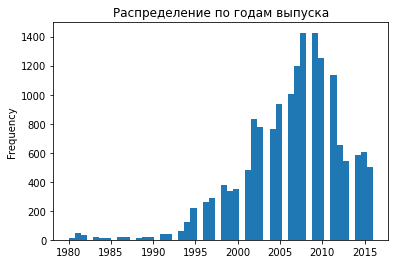

In [21]:
# Посмотрим, сколько игр выпускалось в разные годы.
games['year_of_release'].plot(kind = 'hist',bins = 50)
plt.title('Распределение по годам выпуска')
plt.show()

Игры начали выпускаться с 1980 года. До 1995 сфера особо не развивалась, поэтому данные до этого года не важны для анализа.

In [22]:
# Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение 
# по годам. 
# За какой характерный срок появляются новые и исчезают старые платформы?
#построим сводную таблицу 
sales_by_platform =games.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum']).sort_values(('sum', 'total_sales'),ascending = False)
display(sales_by_platform)

,sum
,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88


Платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS.

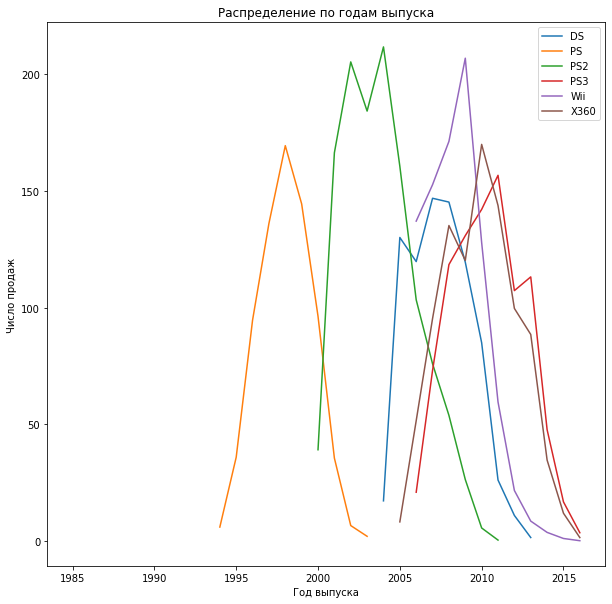

In [23]:
# Построим распределение по годам.
top_sales_platform_df = games.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')
top_platforms_by_years =top_sales_platform_df.pivot_table(
                                 index = ['year_of_release'], 
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
top_platforms_by_years.plot(figsize = (10,10), legend=True, xlabel="Год выпуска", ylabel="Число продаж")
plt.legend(["DS", "PS", "PS2", "PS3", "Wii", "X360"]);
plt.title('Распределение по годам выпуска')
plt.show()

Срок появления новых и исчезания старых платформ - примерно 10 лет.

По графику доходные платформы теряют продажи к 2015 году. Актуальным периодом можно считать - 8 лет. 

In [24]:
# Возьмем данные за соответствующий актуальный период.
actual_games = games.query('year_of_release > 2012')
display(actual_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


In [25]:
# Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
actual_games['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [26]:
# Оценим продажи по этим платформам
sales_by_actual_platforms =actual_games.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
sales_by_actual_platforms.sort_values(('sum', 'total_sales'),ascending = False)

,sum
,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99


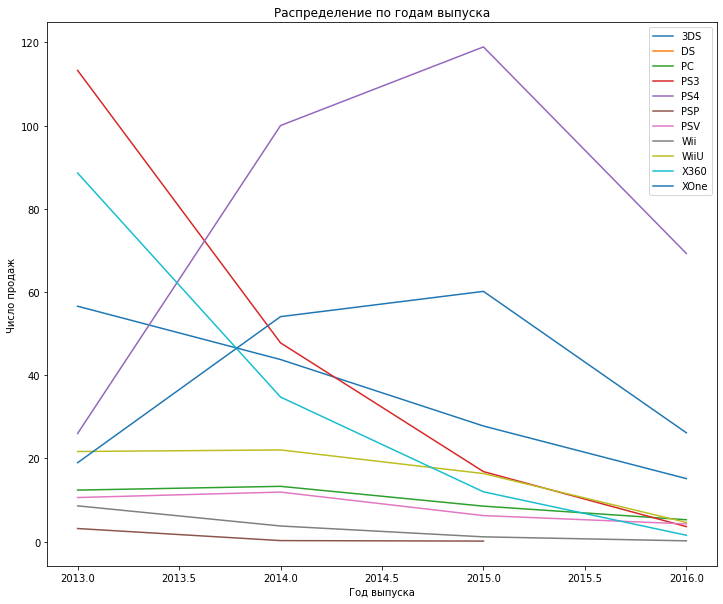

In [27]:
top_platforms_actual_df =actual_games.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
top_platforms_actual_df.plot(figsize = (12,10), xlabel="Год выпуска", ylabel="Число продаж")
plt.legend(["3DS", "DS", "PC", "PS3", "PS4", "PSP", "PSV", "Wii", "WiiU", "X360", "XOne"]);
plt.title('Распределение по годам выпуска')
plt.show()

Большинство платформ теряют продажи к 2016 году. Прибыльными можно считать PS4 и XOne.

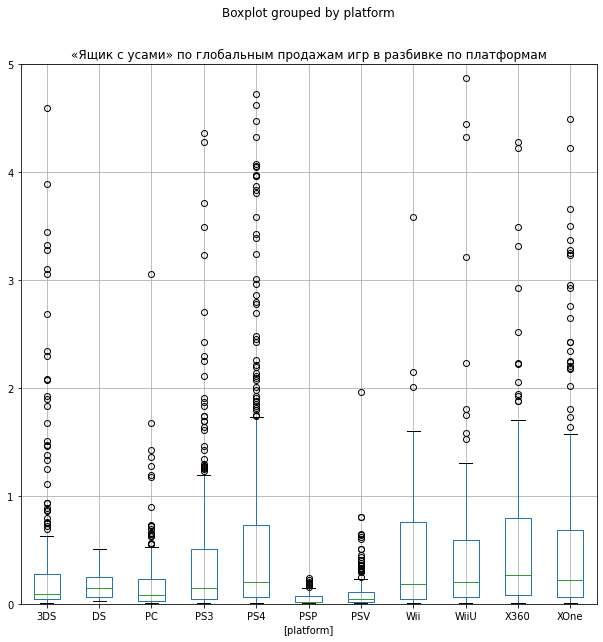

In [28]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
actual_games.boxplot(column=['total_sales'], 
                     by=['platform'],figsize=(10, 10))
plt.ylim([0, 5])
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show()

- Медианы продаж XOne и PS4 находятся примерно на одном уровне. 
- Сразу бросается в глаза **PS4**, **XOne**, **PS3**, **3DS**. Но учитывая предыдущий график, игры для платформ **3DS** и **PS3** теряют популярность.
**Вывод:** Самые продаваемые игры - игры для PS4 и XOne

In [29]:
# Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
# Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

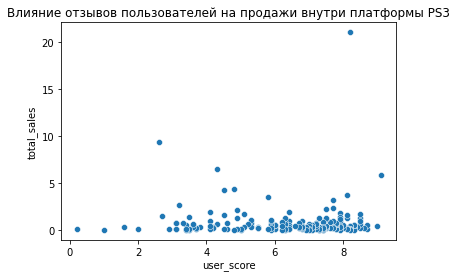

In [30]:
# Посмотрим, как влияют на продажи внутри платформы PS3 отзывы пользователей. 
ps3_df = actual_games.query('platform == "PS3"').sort_values('user_score', ascending = False)
ps3_user_score = sns.scatterplot(data=ps3_df, x='user_score',y='total_sales').set(title="Влияние отзывов пользователей на продажи внутри платформы PS3")

In [31]:
# Коэффициент корреляции 
ps3_df['user_score'].corr(ps3_df['total_sales'])

0.0023944027357566773

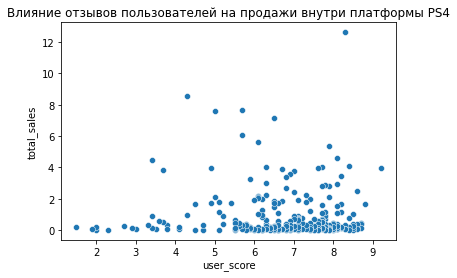

In [32]:
# Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей. 
ps4_df = actual_games.query('platform == "PS4"').sort_values('user_score', ascending = False)
ps4_user_score = sns.scatterplot(data=ps4_df, x='user_score',y='total_sales').set(
    title="Влияние отзывов пользователей на продажи внутри платформы PS4")

In [33]:
# Коэффициент корреляции 
ps4_df['user_score'].corr(ps4_df['total_sales'])

-0.031957110204556424

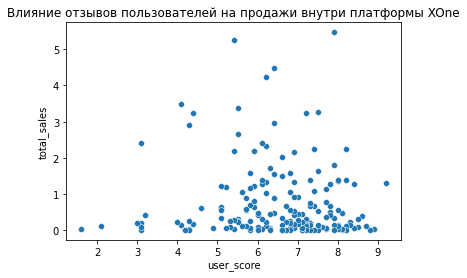

In [34]:
# Посмотрим, как влияют на продажи внутри платформы XOne отзывы пользователей. 
xone_df = actual_games.query('platform == "XOne"').sort_values('user_score', ascending = False)
xone_user_score = sns.scatterplot(data=xone_df, x='user_score',y='total_sales').set(
    title="Влияние отзывов пользователей на продажи внутри платформы XOne")

In [35]:
# Коэффициент корреляции 
xone_df['user_score'].corr(xone_df['total_sales'])

-0.06892505328279423

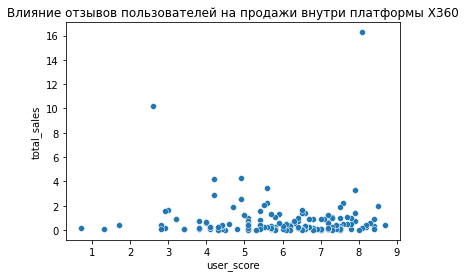

In [36]:
# Посмотрим, как влияют на продажи внутри платформы X360 отзывы пользователей. 
x360_df = actual_games.query('platform == "X360"').sort_values('user_score', ascending = False)
x360_user_score = sns.scatterplot(data=x360_df, x='user_score',y='total_sales').set(
    title="Влияние отзывов пользователей на продажи внутри платформы X360")

In [37]:
# Коэффициент корреляции 
x360_df['user_score'].corr(x360_df['total_sales'])

-0.011742185147181356

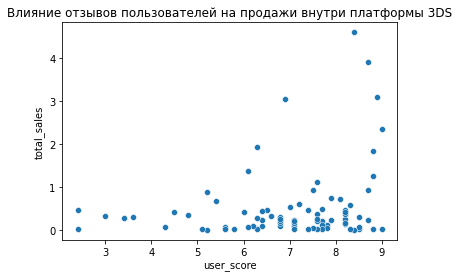

In [38]:
# Посмотрим, как влияют на продажи внутри платформы 3DS отзывы пользователей. 
three_ds_df = actual_games.query('platform == "3DS"').sort_values('user_score', ascending = False)
three_ds_user_score = sns.scatterplot(data=three_ds_df, x='user_score',y='total_sales').set(
    title="Влияние отзывов пользователей на продажи внутри платформы 3DS")

In [39]:
# Коэффициент корреляции 
three_ds_df['user_score'].corr(three_ds_df['total_sales'])

0.2415041177356301

Оценки пользователей не влияют на продажи. Коэффициент корреляции примерно равен 0.

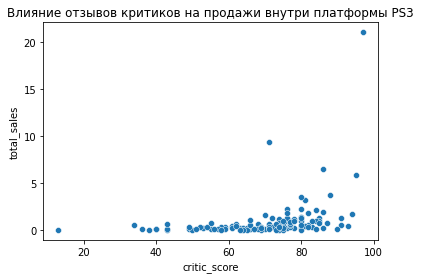

In [40]:
# Посмотрим, как влияют на продажи внутри платформы PS3 отзывы критиков. 
ps3_critic_score = sns.scatterplot(data=ps3_df, x ='critic_score', y='total_sales').set(
    title="Влияние отзывов критиков на продажи внутри платформы PS3")

In [41]:
# Коэффициент корреляции 
ps3_df['critic_score'].corr(ps3_df['total_sales'])

0.33428533933719184

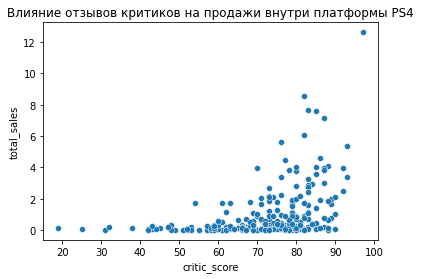

In [42]:
# Посмотрим, как влияют на продажи внутри платформы PS4 отзывы критиков. 
ps4_critic_score = sns.scatterplot(data=ps4_df, x ='critic_score', y='total_sales').set(
    title="Влияние отзывов критиков на продажи внутри платформы PS4")

In [43]:
# Коэффициент корреляции 
ps4_df['critic_score'].corr(ps4_df['total_sales'])

0.40656790206178134

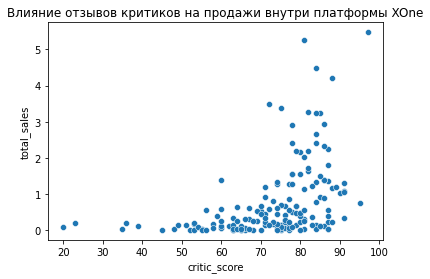

In [44]:
# Посмотрим, как влияют на продажи внутри платформы XOne отзывы критиков. 
xone_critic_score = sns.scatterplot(data=xone_df, x ='critic_score', y='total_sales').set(
    title="Влияние отзывов критиков на продажи внутри платформы XOne")

In [45]:
# Коэффициент корреляции 
xone_df['critic_score'].corr(xone_df['total_sales'])

0.4169983280084016

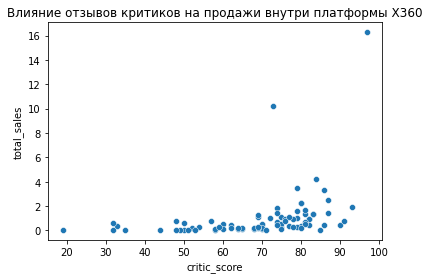

In [46]:
# Посмотрим, как влияют на продажи внутри платформы X360 отзывы критиков. 
x360_critic_score = sns.scatterplot(data=x360_df, x ='critic_score', y='total_sales').set(
    title="Влияние отзывов критиков на продажи внутри платформы X360")

In [47]:
# Коэффициент корреляции 
x360_df['critic_score'].corr(x360_df['total_sales'])

0.3503445460228664

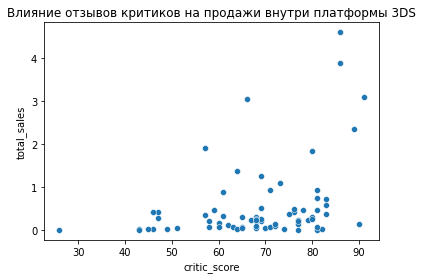

In [48]:
# Посмотрим, как влияют на продажи внутри платформы 3DS отзывы критиков. 
three_ds_critic_score = sns.scatterplot(data=three_ds_df, x ='critic_score', y='total_sales').set(
    title="Влияние отзывов критиков на продажи внутри платформы 3DS")

In [49]:
# Коэффициент корреляции 
three_ds_df['critic_score'].corr(three_ds_df['total_sales'])

0.35705661422881046

Корреляция больше, чем в случае с оценками пользователей, но ее недостаточно, чтобы говорить о прямой зависимости.

Оценки пользователей никак не влияют на продажи. 
Оценки критиков немного влияют на продажи, но говорить о прямой зависимости нельзя.

In [50]:
# Посмотрим на общее распределение игр по жанрам. 
# Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
popular_genre = actual_games.groupby('genre').agg({'name':'count'})
popular_genre.sort_values(by='name', ascending=False)

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


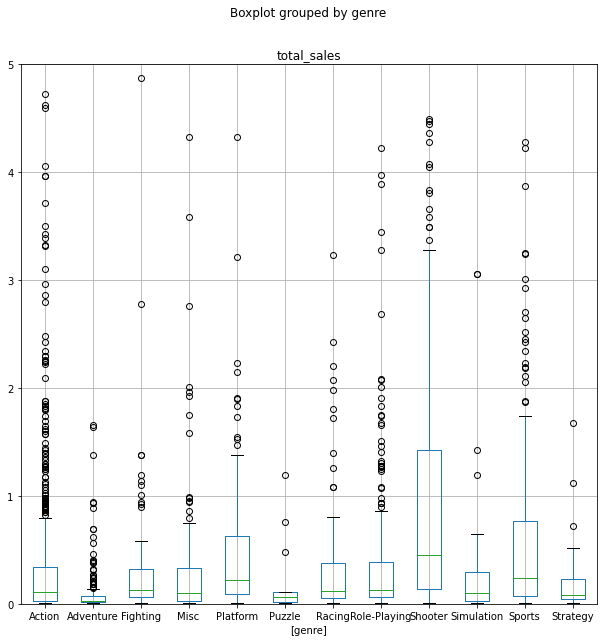

In [51]:
actual_games.boxplot(column = ['total_sales'],by = ['genre'],figsize=(10, 10))
plt.ylim([0, 5])
plt.show()

В жанре Action очень много выбросов. Из-за этого общая прибыль по этому жанру больше остальных.

Медианное значение жанра Shooter выше. Значит, можно предположить, что этот жанр самый прибыльный.



## Составим портрет пользователя каждого региона

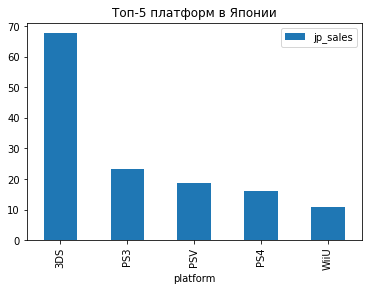

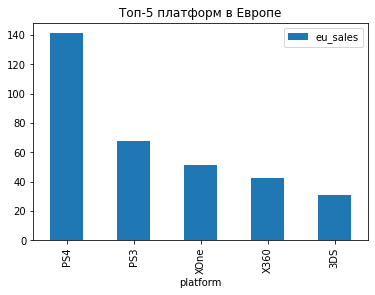

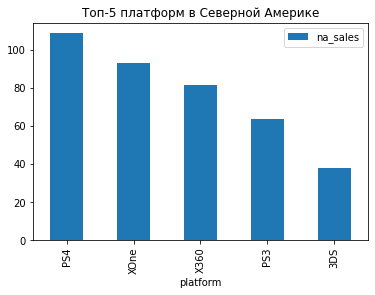

In [52]:
# Самые популярные платформы (топ-5)
actual_games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', title="Топ-5 платформ в Японии")
actual_games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar', title="Топ-5 платформ в Европе")
actual_games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar', title="Топ-5 платформ в Северной Америке")
plt.show()

- Для пользователей из Японии самые популярные платформы: 3DS, PS3, PSV, PS4, WiiU;
- Для пользователей из Европы самые популярные платформы: PS4, PS3, XOne, X360, 3DS;
- Для пользователей из Северной Америки самые популярные платформы: PS4, XOne, X360, PS3, 3DS;

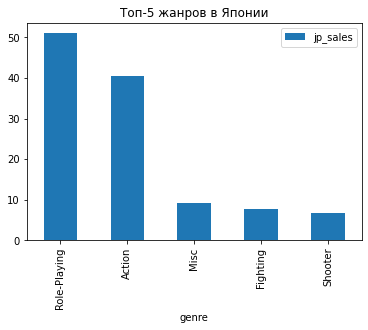

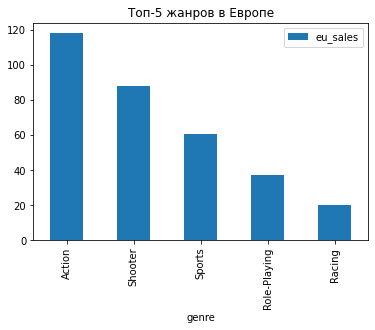

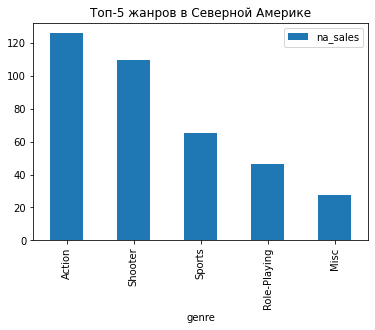

In [53]:
# Самые популярные жанры (топ-5)
actual_games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', title="Топ-5 жанров в Японии")
actual_games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar', title="Топ-5 жанров в Европе")
actual_games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar', title="Топ-5 жанров в Северной Америке")
plt.show()

- Для пользователей из Японии самые популярные жанры: Role-Playing, Action, Misc, Fighting, Shooter;
- Для пользователей из Европы самые популярные жанры: Action, Shooter, Sports, Racing, Role-Playing;
- Для пользователей из Северной Америки самые популярные жанры: Action, Shooter, Sports, Misc, Role-Playing;

Можно отметить, что топ-жанров для пользователей Европы и Северной Америки объединяют жанры Action, Shooter, Sports и Role-Playing

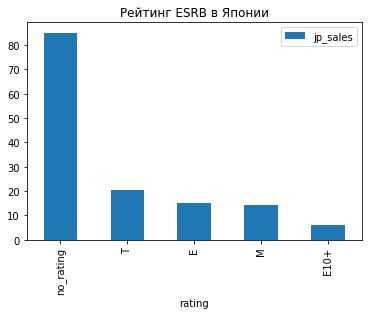

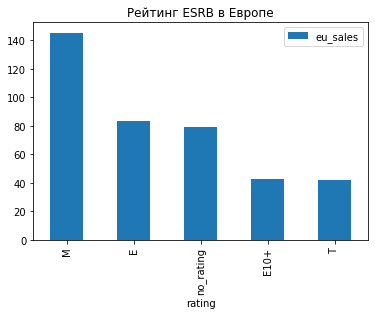

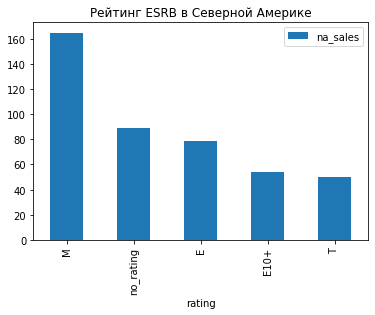

In [54]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
actual_games.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', title="Рейтинг ESRB в Японии")
actual_games.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar', title="Рейтинг ESRB в Европе")
actual_games.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar', title="Рейтинг ESRB в Северной Америке")
plt.show()

- В Северной Америке и Европе первую пятерку составляют игры рейтинга М, E, no_rating, E10+, T. 
- В Японии же с огромным преимуществом пользуются игры без рейтинга. Скорее всего в Японии свой рынок игр и они просто не оцениваются организацией ESRB.

## Проверим гипотезы

In [55]:
# Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевую и альтернативную гипотезы:

- Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

Будем использовать t-критерий Стьюдента, так как наши выборки независимы между собой.

In [56]:
alpha = .05
xbox_one = actual_games[(actual_games['platform'] == 'XOne') & (actual_games['user_score'] > 0)]['user_score']
pc = actual_games[(actual_games['platform'] == 'PC') & (actual_games['user_score'] > 0)]['user_score']

In [57]:
test = st.ttest_ind(xbox_one, pc)
print('p-value:', test.pvalue)

if (test.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Не можем отвергнуть нулевую гипотезу. Это значит, что значимой разницы между пользовательским рейтингом двух платформ (Xbox One и PC) нет. 

In [58]:
# Проверим гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы:

- Н0: Средние пользовательские рейтинги жанров Action и Sports равны
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Здесь также используем  t-критерий Стьюдента.

In [59]:
action = actual_games[(actual_games['genre'] == 'Action') & (actual_games['user_score'] > 0)]['user_score']
sport = actual_games[(actual_games['genre'] == 'Sports') & (actual_games['user_score'] > 0)]['user_score']

In [60]:
test = st.ttest_ind(action, sport)
print('p-value:', test.pvalue)

if (test.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, это значит, что пользовательские рейтинги жанров Action и Sports различаются.

# Общий вывод

Успешность игры определяют следующие параметры:
  - Регион
  - Платформа, которая наиболее распространена в данном регионе
  - Жанр
  - Рейтинг критиков
  
**Игры, которые будут продаваться в Северной Америке лучше всего:**
- ESRB: M, E, без рейтинга
- Платформа: PS4, XOne, Xbox360, PS3, 3DS
- Жанры: Action, Shooter, Sports, Role-Playing, Misc

**Игры, которые будут продаваться в Европе лучше всего:**
- ESRB: E, M, без рейтинга
- Платформы:  PS4, PS3, XOne, X360, 3DS
- Жанры: Action, Shooter, Sports, Role-Playing, Racing

**Игры, которые будут продаваться в Японии лучше всего:**
- ESRB: E, T, без рейтинга
- Платформы: DS, 3DS, PS3, PSP, Wii
- Жанры: Role-Playing, Action, Misc, Fighting, Shooter